# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

# Imports

In [1]:
# Standard imports for pandas and sklearn sample datasets
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pylab as pl
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

# Loading  CSV into dataframe

In [2]:
# Load data from csv
mushroom_data = pd.read_csv("./agaricus-lepiota.csv", dtype="category")
df = pd.DataFrame(mushroom_data) # Put into dataframe

# Convert to numerical values and scale

In [3]:
X = pd.get_dummies(df)
data_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns) 

# Determine optimal clusters using Kmeans

Optimal no of clusters: 12


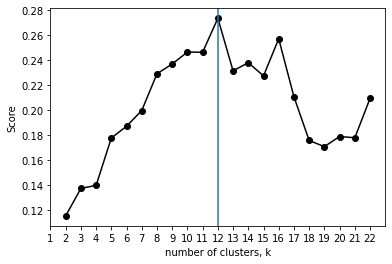

In [7]:
scores = []

for k in range(2,df.shape[1]):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(data_scaled)
 
    # Append the score to list
    scores.append(silhouette_score(data_scaled, kmeans.labels_, metric='euclidean'))
    
#Max score is optimal numbers of clusters
optimal_no_of_clusters = scores.index(max(scores))+2
print("Optimal no of clusters:", optimal_no_of_clusters)
                      
#Visualize
plt.plot(range(2,df.shape[1]), scores, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.axvline(x=optimal_no_of_clusters)
plt.ylabel('Score')
plt.xticks(range(1,df.shape[1]))
plt.show()

# Visualizations

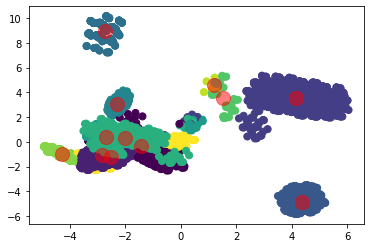

In [8]:
#Pca for dimension reduction and feature 
pca = decomposition.PCA(n_components=optimal_no_of_clusters)
pca.fit(data_scaled)
Xpca = pca.transform(data_scaled)

#Kmeans algorithm to determine clusters
kmeans = KMeans(n_clusters=optimal_no_of_clusters)
kmeans.fit(Xpca)
y_kmeans = kmeans.predict(Xpca)

#2D Visualization of kmeans clusters
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);



# 3D visualization of clusters

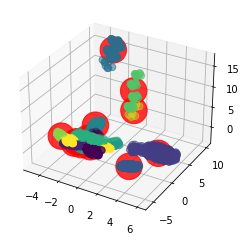

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(Xpca[:, 0], Xpca[:, 1], zs=Xpca[:, 2], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], zs=centers[:, 2], c='red', s=700, alpha=0.8)
